In [1]:
from hypersurface_tf import *
from generate_h import *
import sympy as sp
from pprint import pprint
from scipy.optimize import minimize
from sympy.utilities.iterables import flatten
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

In [2]:
z0, z1, z2, z3, z4= sp.symbols('z0, z1, z2, z3, z4')
Z = [z0,z1,z2,z3,z4]
f = z0**5 + z1**5 + z2**5 + z3**5 + z4**5 + 0.5*z0*z1*z2*z3*z4
HS = Hypersurface(Z, f, 1000)

In [3]:
k = 6
HS.set_k(k)

In [4]:
factor = HS.integrate(lambda patch: patch.num_eta_tf('FS'), holomorphic=True, tensor=True)

Normalization factor of eta

In [5]:
h_sym = get_sym_info(HS)

In [6]:
print_flag = 0

Reconstruct h matrix from the parameters

In [7]:
def integration(param): 
    h = param_to_matrix(param, h_sym)
    #h = np.matmul(g, np.conj(g.transpose()))
    
    integration = HS.integrate(lambda patch, h_matrix=h: 
                                tf.abs(patch.num_eta_tf(h_matrix)/factor - 1), 
                                holomorphic=True, tensor=True)
    global print_flag
    if print_flag % (len(param)+1) == 0:
        print(HS.integrate(lambda patch: patch.num_FS_volume_form_tf(h)/patch.num_FS_volume_form_tf('FS'), tensor=True))
        print(integration)
        print(param)
        plot_eta_hist(HS, h, factor)
        #if np.allclose(h, h.conj().T, rtol=1e-05, atol=1e-08):
        #    print("hermitian")
        #else:
        #    print("not hermitian")
        try:
            np.linalg.cholesky(h)
        except:
            print("Not positive definite")
    print_flag += 1
    
    return integration

Set an initial condition

In [8]:
g0 = initial_FS_param(HS, h_sym)

0.9999999999999998
0.3713968608431316
[0.         0.         1.79175947 0.         0.         2.7080502
 0.         3.40119738 0.         2.99573227 0.         4.09434456
 4.78749174 4.49980967 5.19295685 5.88610403 0.         0.
 0.         0.         0.         0.         0.        ]


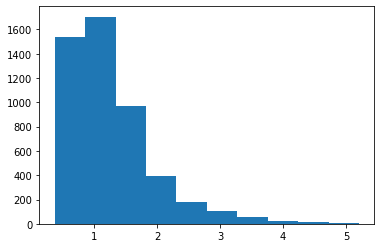

1.100147056560507
0.18822676123628604
[ 3.36642826e-03 -8.10832133e-02  1.94913581e+00  2.38800900e-02
 -5.88407917e-02  2.97278185e+00  1.43179676e-02  3.65985968e+00
  3.04409947e-02  3.15523366e+00  4.05894086e-04  4.46613862e+00
  4.55945402e+00  4.48891764e+00  4.45216212e+00  5.63725604e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


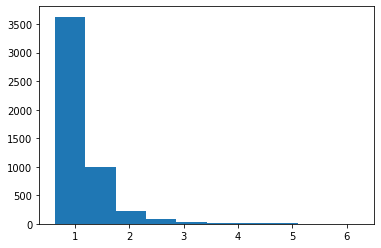

1.2473457474505973
0.10704005111902634
[ 6.93936822e-03 -3.28628021e-01  2.44044858e+00  8.56943781e-02
 -2.09280955e-01  3.70635553e+00  7.65235236e-02  4.36026860e+00
  1.19566692e-01  3.52275831e+00  2.01092633e-04  4.41292728e+00
  4.09393190e+00  4.17907777e+00  3.39372648e+00  5.17533391e+00
 -1.43253113e-06 -1.76761885e-04  8.84743685e-05 -4.22596684e-05
  2.05101088e-04  4.30506748e-04 -5.04500095e-06]


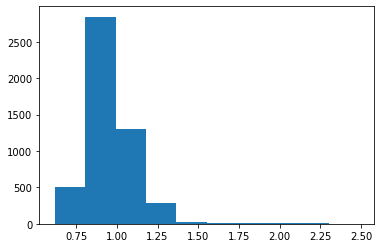

Not positive definite
1.190540380337718
0.0556219369426352
[ 1.32946234e-03 -2.74053571e-01  2.27753694e+00  2.81390739e-02
 -1.38995099e-01  3.41130305e+00  2.95890952e-02  4.09173640e+00
  5.52692501e-02  3.39861732e+00  2.80700103e-04  4.31454154e+00
  4.36675800e+00  4.23645571e+00  3.70373810e+00  5.49792290e+00
  9.24287964e-06  1.62290613e-04  1.02264766e-03  5.99453967e-04
  6.09875817e-04  8.05685480e-04 -2.32956731e-06]


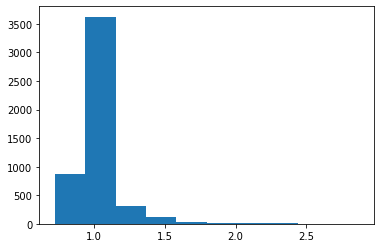

1.2043060534567178
0.036196379912956135
[-2.40896846e-03 -3.22207104e-01  2.36457473e+00  2.64630986e-02
 -1.51837990e-01  3.49465743e+00  5.48946525e-02  4.18209690e+00
  8.26339696e-02  3.43155438e+00  7.69080300e-04  4.09949299e+00
  4.38198132e+00  4.16296039e+00  3.63403889e+00  5.53420806e+00
  1.31637641e-05  2.07656400e-04  1.44651956e-03  7.76953559e-04
  9.51645050e-04  1.26094325e-03 -9.92808559e-07]


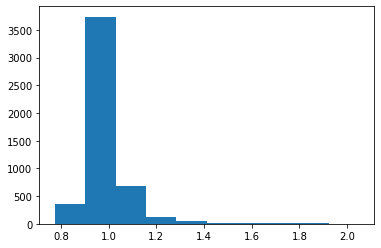

1.1985452094620894
0.03756427934324282
[-2.32666045e-03 -3.35588600e-01  2.37141284e+00  1.60539330e-02
 -1.37091069e-01  3.50142041e+00  3.42344630e-02  4.11239331e+00
  5.10821564e-02  3.43468996e+00  1.87014079e-03  4.01664395e+00
  4.41543237e+00  4.15987093e+00  3.69351806e+00  5.57596722e+00
  1.37652125e-05  3.07191863e-04  1.71560730e-03  9.73865477e-04
  1.27818152e-03  1.70935206e-03 -7.58860624e-07]


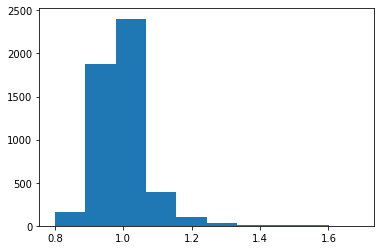

1.2025226256570372
0.035226186510354585
[-2.38288043e-03 -3.26448452e-01  2.36674211e+00  2.31638492e-02
 -1.47163862e-01  3.49680100e+00  4.83462777e-02  4.16000392e+00
  7.26334273e-02  3.43254822e+00  1.11806823e-03  4.07323347e+00
  4.39258384e+00  4.16198117e+00  3.65289118e+00  5.54744389e+00
  1.33543969e-05  2.39204780e-04  1.53180858e-03  8.39366009e-04
  1.05514280e-03  1.40306920e-03 -9.18657314e-07]


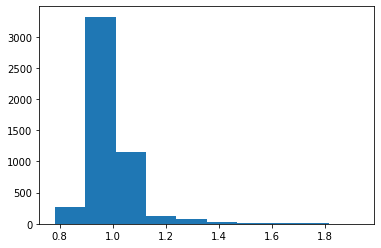

1.206279768771399
0.0316857250731403
[ 2.60375910e-04 -3.44159460e-01  2.38993248e+00  2.41677860e-02
 -1.38045549e-01  3.55422142e+00  2.47342010e-02  4.09232725e+00
  3.74621011e-02  3.45706776e+00  2.63456591e-03  4.04802501e+00
  4.36971678e+00  4.17272647e+00  3.68476157e+00  5.50968417e+00
  1.08320797e-05  3.12159554e-04  1.57909024e-03  9.51378363e-04
  1.37479739e-03  1.88433376e-03 -1.08081679e-06]


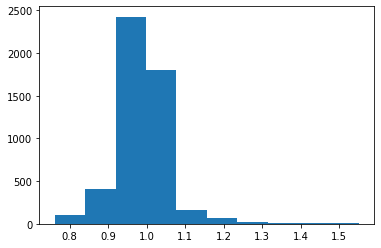

1.2106861289681612
0.028777033967624863
[ 1.92077918e-03 -3.70455832e-01  2.42196501e+00  3.64425669e-02
 -1.20166744e-01  3.63536558e+00  3.59893732e-02  3.97217816e+00
  3.97823762e-02  3.48818334e+00  1.97957787e-03  3.99773485e+00
  4.34535032e+00  4.19524307e+00  3.76998522e+00  5.44335981e+00
  6.91990390e-06  4.22839745e-04  1.68309797e-03  1.07165327e-03
  1.87151522e-03  2.68473581e-03  4.64269709e-06]


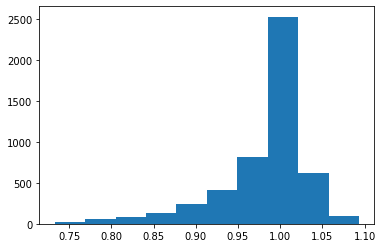

1.2088521000240406
0.026160767038859885
[ 1.69841065e-03 -3.76741450e-01  2.43100740e+00  4.40710923e-02
 -1.16853536e-01  3.62053144e+00  4.90500446e-02  3.97494068e+00
  5.16842642e-02  3.47471380e+00  2.02920349e-03  3.96868696e+00
  4.37107347e+00  4.19686902e+00  3.81669297e+00  5.41255835e+00
  6.71202962e-06  4.75019548e-04  1.67380789e-03  1.17698662e-03
  1.92029352e-03  2.72922488e-03  8.49317130e-06]


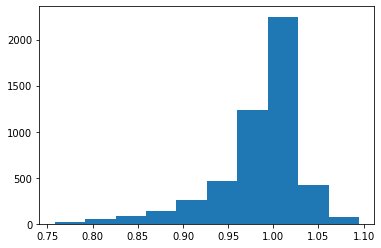

1.2030359969753597
0.023597700236487138
[ 3.10837539e-03 -4.20376139e-01  2.49530934e+00  8.14880371e-02
 -9.64849904e-02  3.60955489e+00  8.36116179e-02  3.93825883e+00
  7.33267014e-02  3.43528158e+00  3.00443944e-03  3.81465183e+00
  4.46204154e+00  4.21142878e+00  4.05032090e+00  5.23475161e+00
  2.70741246e-06  7.75999347e-04  1.62567737e-03  1.69998399e-03
  2.40467480e-03  3.29585419e-03  3.16685797e-05]


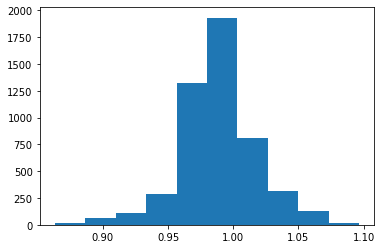

Not positive definite
1.1926253959072435
0.026931017158895912
[ 6.19970488e-03 -4.21893253e-01  2.49964796e+00  1.10721722e-01
 -8.98553115e-02  3.54098483e+00  8.29021433e-02  3.95130508e+00
  7.19920292e-02  3.38032163e+00  3.38397985e-03  3.83428292e+00
  4.50788040e+00  4.25370080e+00  4.19903747e+00  5.08246889e+00
 -2.00135694e-06  8.64443442e-04  1.15830276e-03  1.75020758e-03
  2.21480912e-03  2.90667528e-03  4.49172107e-05]


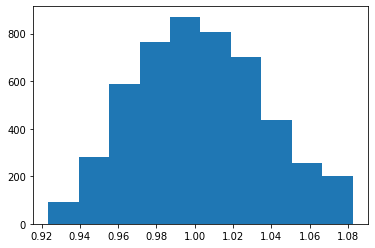

Not positive definite
1.199955875950146
0.022041591166190196
[ 4.07264416e-03 -4.20849368e-01  2.49666267e+00  9.06068093e-02
 -9.44170153e-02  3.58816604e+00  8.33903137e-02  3.94232830e+00
  7.29103813e-02  3.41813809e+00  3.12282829e-03  3.82077530e+00
  4.47633991e+00  4.22461456e+00  4.09670960e+00  5.18725054e+00
  1.23862070e-06  8.03587438e-04  1.47989066e-03  1.71565008e-03
  2.34545059e-03  3.17445882e-03  3.58011839e-05]


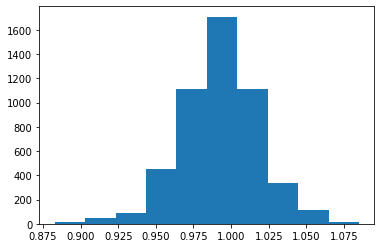

Not positive definite
1.2018116063744841
0.019576705616700406
[ 5.43756087e-03 -4.18839026e-01  2.49718172e+00  8.94053514e-02
 -9.80171951e-02  3.59020801e+00  6.13310104e-02  3.95227415e+00
  5.27395746e-02  3.41886900e+00  3.44386221e-03  3.84615980e+00
  4.45819642e+00  4.23005287e+00  4.07797157e+00  5.18073033e+00
 -1.67738125e-07  7.49470724e-04  1.31149805e-03  1.58361517e-03
  2.20955027e-03  2.93536219e-03  3.28371636e-05]


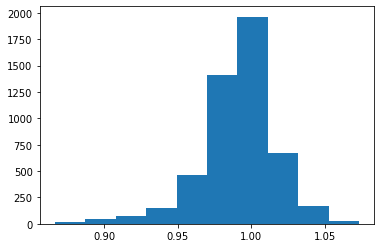

Not positive definite
1.207020696264997
0.02608646514944568
[ 1.59744083e-02 -4.49169207e-01  2.55702229e+00  1.17272910e-01
 -9.17962703e-02  3.64155831e+00 -3.16614937e-02  3.90311121e+00
 -4.78687460e-02  3.41331141e+00  6.18557057e-03  3.88150186e+00
  4.39065857e+00  4.29606966e+00  4.17757814e+00  4.97931407e+00
 -1.40778340e-05  5.48445473e-04  3.79079989e-04  1.10677912e-03
  2.03444708e-03  2.27597836e-03  1.81053572e-05]


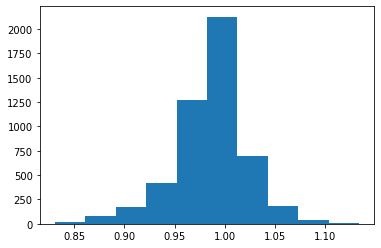

Not positive definite
1.2034506043356694
0.017533201894176283
[ 8.40375935e-03 -4.27377190e-01  2.51402727e+00  9.72502701e-02
 -9.62659599e-02  3.60466349e+00  3.51529504e-02  3.93843442e+00
  2.44176073e-02  3.41730450e+00  4.21567287e-03  3.85610884e+00
  4.43918403e+00  4.24863707e+00  4.10601154e+00  5.12403020e+00
 -4.08353035e-06  6.92880667e-04  1.04901564e-03  1.44938239e-03
  2.16025746e-03  2.74974089e-03  2.86900540e-05]


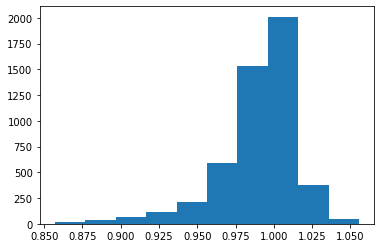

Not positive definite
1.2038352951373048
0.014581071699444429
[ 1.14456314e-02 -4.47462768e-01  2.55826544e+00  1.19052351e-01
 -9.87285428e-02  3.59350812e+00  2.55513126e-02  3.97108012e+00
  1.37494324e-02  3.38961356e+00  5.49136539e-03  3.82944660e+00
  4.45156002e+00  4.26249637e+00  4.17395978e+00  5.01109044e+00
 -9.13748092e-06  6.60317840e-04  7.70394540e-04  1.42287231e-03
  2.18378986e-03  2.52403625e-03  3.04276255e-05]


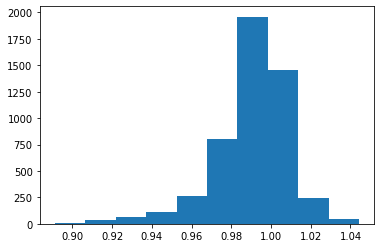

Not positive definite
1.1973477788606968
0.01544180081939408
[ 2.00007223e-02 -5.13798645e-01  2.68855492e+00  1.89822458e-01
 -9.00279409e-02  3.58532821e+00  3.09593274e-02  3.97960145e+00
  1.83871975e-02  3.31840467e+00  9.48442881e-03  3.73457297e+00
  4.48358123e+00  4.32336816e+00  4.44330160e+00  4.65951727e+00
 -2.18786643e-05  6.96683032e-04  1.81203263e-04  1.50220922e-03
  2.39285677e-03  2.11991742e-03  3.48252915e-05]


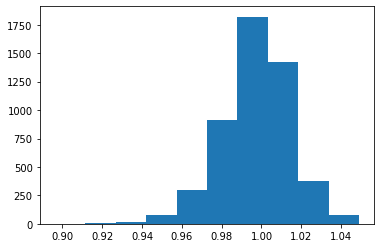

Not positive definite
1.2014352025378592
0.011498187103129809
[ 1.56951002e-02 -4.80413000e-01  2.62298258e+00  1.54205147e-01
 -9.44067961e-02  3.58944501e+00  2.82375716e-02  3.97531282e+00
  1.60530944e-02  3.35424282e+00  7.47479239e-03  3.78232115e+00
  4.46746554e+00  4.29273249e+00  4.30774675e+00  4.83645767e+00
 -1.54662577e-05  6.78381090e-04  4.77732550e-04  1.46228039e-03
  2.28763719e-03  2.32330310e-03  3.26120259e-05]


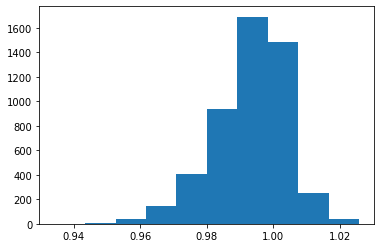

Not positive definite
1.2048351306933092
0.009618526538998822
[ 2.19796060e-02 -5.28580005e-01  2.73100354e+00  2.01723028e-01
 -9.76890757e-02  3.60299242e+00  4.02277601e-02  3.99286649e+00
  3.15463438e-02  3.30991622e+00  1.13789031e-02  3.75939866e+00
  4.43821586e+00  4.34039433e+00  4.41663972e+00  4.61887719e+00
 -2.04553082e-05  3.97755085e-04  5.66286305e-04  1.22117354e-03
  2.32994554e-03  1.82308408e-03  2.83176889e-05]


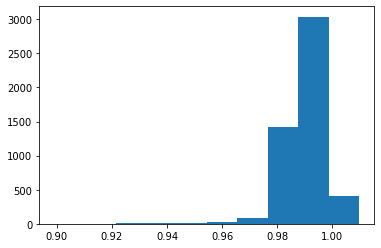

Not positive definite
1.2050353513441747
0.00952836872725174
[ 2.20857152e-02 -5.26885436e-01  2.72694363e+00  1.99047611e-01
 -9.72428491e-02  3.60220565e+00  3.20845572e-02  3.99321995e+00
  2.37165536e-02  3.31129995e+00  1.05432297e-02  3.76568820e+00
  4.43546506e+00  4.34115553e+00  4.40825969e+00  4.62670129e+00
 -1.95201725e-05  3.83117707e-04  6.48203959e-04  1.19884700e-03
  2.40369698e-03  1.87722331e-03  1.33826006e-05]


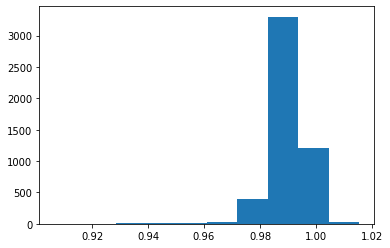

Not positive definite
1.203997159626561
0.009567812121497538
[ 2.26836943e-02 -5.31450176e-01  2.73518417e+00  2.03201065e-01
 -9.61502457e-02  3.59985078e+00  3.00093623e-02  3.99438771e+00
  2.20773881e-02  3.30584318e+00  1.06646746e-02  3.75680422e+00
  4.44017348e+00  4.34464675e+00  4.42872873e+00  4.60364227e+00
 -1.95001204e-05  3.92717059e-04  6.91919945e-04  1.21114491e-03
  2.46100485e-03  1.89617985e-03  1.29883619e-05]


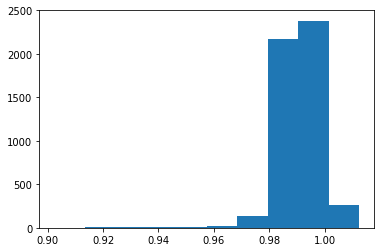

Not positive definite
1.2046198237239998
0.009492327912039269
[ 2.23273895e-02 -5.28730283e-01  2.73027406e+00  2.00726236e-01
 -9.68012716e-02  3.60125393e+00  3.12458637e-02  3.99369190e+00
  2.30540821e-02  3.30909459e+00  1.05923118e-02  3.76209773e+00
  4.43736797e+00  4.34256651e+00  4.41653228e+00  4.61738195e+00
 -1.95120684e-05  3.86997301e-04  6.65871848e-04  1.20381722e-03
  2.42685805e-03  1.88488463e-03  1.32232684e-05]


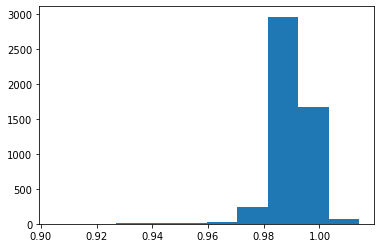

Not positive definite
1.2045944975399345
0.009475009744229962
[ 2.20366061e-02 -5.27298158e-01  2.72723919e+00  1.99390843e-01
 -9.67006859e-02  3.59974564e+00  3.34980895e-02  3.99383297e+00
  2.72740324e-02  3.30977295e+00  1.06721093e-02  3.76372288e+00
  4.43796654e+00  4.34141585e+00  4.41216123e+00  4.62491766e+00
 -1.79712438e-05  4.19482304e-04  7.99807056e-04  1.22481968e-03
  2.45804345e-03  1.93246033e-03  1.75823612e-05]


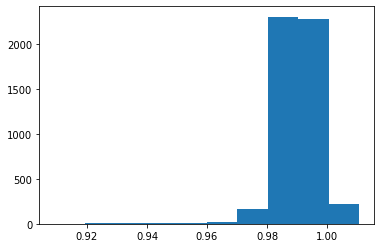

Not positive definite
1.2044469927910053
0.009459875382816047
[ 2.20066460e-02 -5.26876233e-01  2.72593154e+00  1.98602925e-01
 -9.62547202e-02  3.59797442e+00  3.21784840e-02  3.99415722e+00
  2.77374954e-02  3.30938262e+00  1.04998465e-02  3.76515473e+00
  4.43817993e+00  4.34185172e+00  4.41087306e+00  4.62741245e+00
 -1.59879694e-05  4.34369825e-04  9.63923556e-04  1.23349711e-03
  2.52050177e-03  1.99759827e-03  1.71159288e-05]


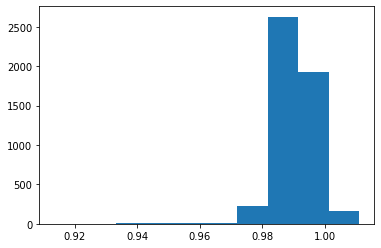

Not positive definite
1.2038565875200973
0.009422746830671127
[ 2.18868057e-02 -5.25188535e-01  2.72070096e+00  1.95451253e-01
 -9.44708577e-02  3.59088956e+00  2.69000619e-02  3.99545419e+00
  2.95913474e-02  3.30782130e+00  9.81079494e-03  3.77088212e+00
  4.43903348e+00  4.34359521e+00  4.40572040e+00  4.63739160e+00
 -8.05487157e-06  4.93919913e-04  1.62038955e-03  1.26820682e-03
  2.77033507e-03  2.25815002e-03  1.52501994e-05]


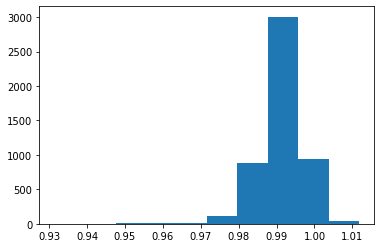

Not positive definite
1.2035693411863666
0.009409869705682089
[ 2.16483484e-02 -5.23756148e-01  2.71599615e+00  1.91864028e-01
 -9.25856476e-02  3.58529352e+00  2.29794197e-02  3.99480973e+00
  3.32913019e-02  3.30700351e+00  9.14787852e-03  3.77690657e+00
  4.43795353e+00  4.34544762e+00  4.39766147e+00  4.65087877e+00
 -1.18102767e-07  5.20345272e-04  2.32128454e-03  1.29223773e-03
  3.02880086e-03  2.57949058e-03  1.53090401e-05]


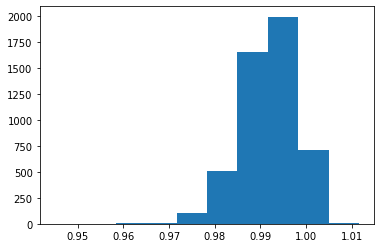

Not positive definite
1.2037164915712
0.009407706285210662
[ 2.17698442e-02 -5.24485960e-01  2.71839329e+00  1.93691747e-01
 -9.35461767e-02  3.58814475e+00  2.49770172e-02  3.99513809e+00
  3.14061466e-02  3.30742018e+00  9.48563955e-03  3.77383707e+00
  4.43850377e+00  4.34450381e+00  4.40176756e+00  4.64400695e+00
 -4.16194772e-06  5.06881348e-04  1.96417314e-03  1.27999379e-03
  2.89711055e-03  2.41576509e-03  1.52790603e-05]


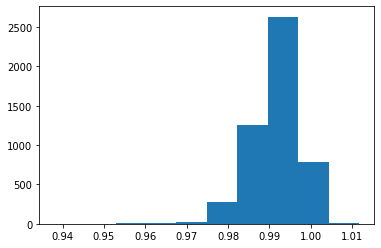

Not positive definite
1.2036336502096103
0.009380389464071055
[ 2.15084102e-02 -5.25708317e-01  2.71734046e+00  1.88254794e-01
 -8.94612457e-02  3.58206019e+00  1.73950490e-02  3.99029547e+00
  3.84347901e-02  3.30501822e+00  8.41470393e-03  3.77880542e+00
  4.43420871e+00  4.34938886e+00  4.39062035e+00  4.66337115e+00
  1.56560527e-05  4.94600512e-04  3.62610562e-03  1.31405019e-03
  3.44869511e-03  3.16889191e-03  7.55753376e-06]


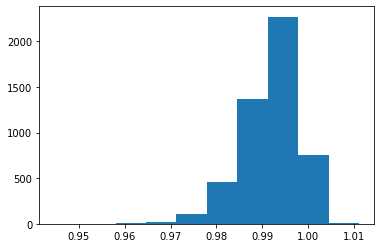

Not positive definite
1.2037404092707038
0.009356011835275988
[ 2.16504128e-02 -5.29108483e-01  2.72325033e+00  1.88867344e-01
 -8.80531125e-02  3.58267914e+00  1.60983054e-02  3.98771025e+00
  4.03561340e-02  3.30291560e+00  8.53433341e-03  3.77502945e+00
  4.43278767e+00  4.35197249e+00  4.39401563e+00  4.65943384e+00
  1.99563113e-05  4.96317204e-04  4.05594024e-03  1.33895846e-03
  3.58294319e-03  3.41932144e-03  7.63809962e-06]


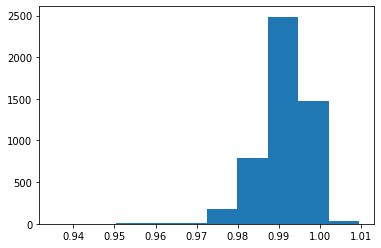

Not positive definite
1.2033637204488474
0.009295766962589512
[ 2.20198075e-02 -5.36695886e-01  2.73478376e+00  1.88814276e-01
 -8.31482979e-02  3.57801750e+00  8.60448271e-03  3.98280341e+00
  4.59604708e-02  3.29546047e+00  8.42128049e-03  3.76992375e+00
  4.43033512e+00  4.36070953e+00  4.40171903e+00  4.65305390e+00
  3.66165864e-05  5.42744202e-04  5.61097625e-03  1.42525037e-03
  4.09530018e-03  4.24344015e-03  5.35194305e-06]


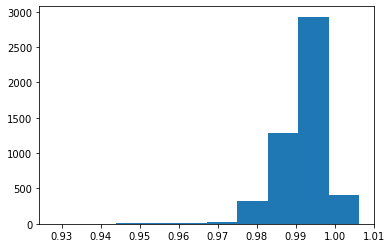

Not positive definite
1.202815948248719
0.009257269724997779
[ 2.24549792e-02 -5.49778308e-01  2.75289876e+00  1.85154334e-01
 -7.26812437e-02  3.56708877e+00 -8.83246685e-03  3.97206734e+00
  5.81989042e-02  3.28224255e+00  7.51571024e-03  3.76457874e+00
  4.42371511e+00  4.37737541e+00  4.40609175e+00  4.65551968e+00
  7.35801530e-05  5.53245095e-04  9.06206351e-03  1.56088939e-03
  5.24076453e-03  6.08654444e-03 -6.40524746e-06]


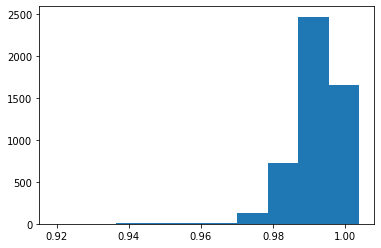

Not positive definite
1.2028793875212251
0.009236045915766376
[ 2.23206531e-02 -5.53455363e-01  2.75777891e+00  1.83089258e-01
 -6.93016927e-02  3.56149793e+00 -1.32944567e-02  3.97097726e+00
  6.27775662e-02  3.27803959e+00  7.03545347e-03  3.76468359e+00
  4.42195612e+00  4.38133981e+00  4.40088720e+00  4.66289655e+00
  8.45962479e-05  4.68707287e-04  1.01625304e-02  1.57775530e-03
  5.61187207e-03  6.77697207e-03 -2.38625048e-05]


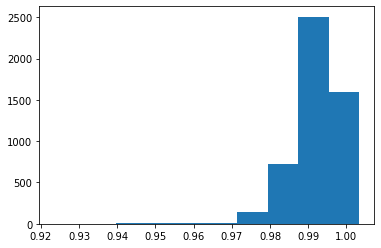

Not positive definite
1.2029023457276786
0.009223521970355014
[ 2.21306360e-02 -5.58916685e-01  2.76514954e+00  1.80797001e-01
 -6.44662063e-02  3.55330872e+00 -1.92429310e-02  3.97000049e+00
  6.80266274e-02  3.27175652e+00  6.51069882e-03  3.76440295e+00
  4.42022302e+00  4.38691714e+00  4.39481130e+00  4.67124222e+00
  9.64783499e-05  2.95437248e-04  1.15267719e-02  1.58508299e-03
  6.09295572e-03  7.75212187e-03 -5.34281573e-05]


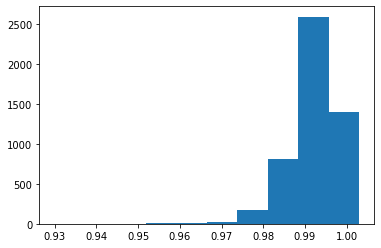

Not positive definite
1.2028814105218435
0.009213388792621105
[ 2.18045074e-02 -5.63172763e-01  2.77051224e+00  1.79758910e-01
 -6.03446351e-02  3.54652125e+00 -2.21261768e-02  3.96935248e+00
  6.94641393e-02  3.26694810e+00  6.47587899e-03  3.76476636e+00
  4.41983215e+00  4.39097217e+00  4.38942790e+00  4.67773027e+00
  9.96032169e-05  2.68969969e-06  1.22697063e-02  1.54980460e-03
  6.37478882e-03  8.52891341e-03 -8.68471938e-05]


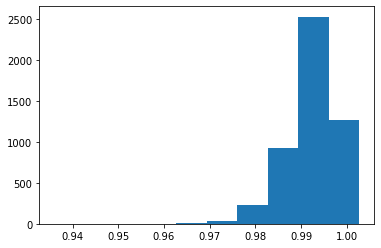

Not positive definite
1.2028588966708367
0.009209524129739237
[ 2.11767377e-02 -5.70099698e-01  2.77959099e+00  1.80125371e-01
 -5.41063085e-02  3.53673755e+00 -2.30345869e-02  3.96882991e+00
  6.88961552e-02  3.25960512e+00  7.07262519e-03  3.76483019e+00
  4.42038452e+00  4.39682201e+00  4.38304083e+00  4.68340785e+00
  9.53092600e-05 -6.44113972e-04  1.27873104e-02  1.44546845e-03
  6.63498446e-03  9.68667202e-03 -1.54275829e-04]


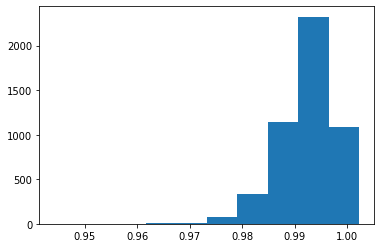

Not positive definite
1.2028694460284863
0.009206905909455887
[ 2.14890263e-02 -5.66653843e-01  2.77507470e+00  1.79943072e-01
 -5.72096097e-02  3.54160452e+00 -2.25826917e-02  3.96908987e+00
  6.91787031e-02  3.26325794e+00  6.77576943e-03  3.76479844e+00
  4.42010974e+00  4.39391196e+00  4.38621813e+00  4.68058350e+00
  9.74453202e-05 -3.22356759e-04  1.25298245e-02  1.49737123e-03
  6.50554824e-03  9.11073654e-03 -1.20732962e-04]


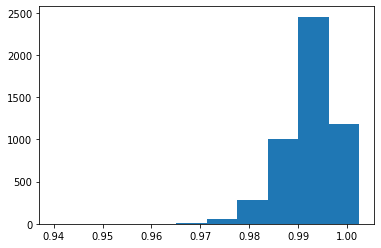

Not positive definite
1.202949813385642
0.00918428905990882
[ 2.07782727e-02 -5.77242843e-01  2.79018710e+00  1.82599323e-01
 -4.90996508e-02  3.53103786e+00 -2.22968879e-02  3.96805334e+00
  6.52120808e-02  3.25349078e+00  8.23999820e-03  3.76226922e+00
  4.42131469e+00  4.40175197e+00  4.38237559e+00  4.67992845e+00
  8.58107748e-05 -1.26376323e-03  1.28383195e-02  1.34372106e-03
  6.69732354e-03  1.06279852e-02 -2.16028697e-04]


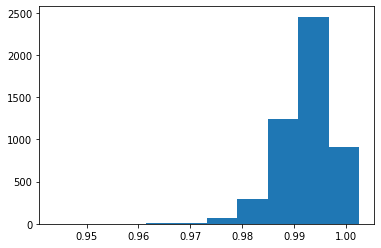

Not positive definite
1.2034516813851173
0.009796977575910509
[ 1.49953875e-02 -6.61900365e-01  2.90694511e+00  2.01780778e-01
  2.01617506e-02  3.44855166e+00 -2.32620604e-02  3.94764367e+00
  3.71560968e-02  3.17791875e+00  1.97791091e-02  3.74210449e+00
  4.43098415e+00  4.46723597e+00  4.35302441e+00  4.68200475e+00
  1.63475521e-05 -8.74975177e-03  1.58108236e-02  1.65114531e-04
  8.61562707e-03  2.20015992e-02 -1.02545648e-03]


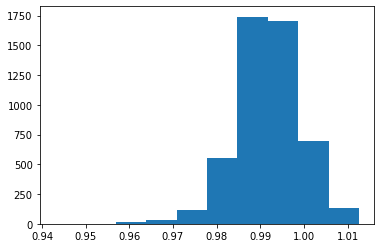

Not positive definite
1.202980085630751
0.009149365268332904
[ 1.95733918e-02 -5.94881483e-01  2.81451397e+00  1.86595834e-01
 -3.46688372e-02  3.51385162e+00 -2.24979844e-02  3.96380092e+00
  5.93665353e-02  3.23774513e+00  1.06442054e-02  3.75806784e+00
  4.42332935e+00  4.41539575e+00  4.37626019e+00  4.68036105e+00
  7.13379112e-05 -2.82349062e-03  1.34576493e-02  1.09815497e-03
  7.09700764e-03  1.29977107e-02 -3.84675319e-04]


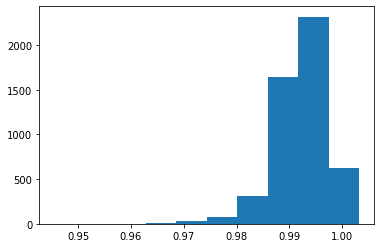

Not positive definite
1.2050265534721698
0.01428876339792917
[ 7.07782409e-03 -7.61914874e-01  3.04125080e+00  2.23537735e-01
  1.06044175e-01  3.34437093e+00 -2.02436031e-02  3.92274513e+00
 -6.16485551e-04  3.08830786e+00  3.43963021e-02  3.72387584e+00
  4.44545503e+00  4.54406532e+00  4.30463110e+00  4.70142110e+00
 -7.05641598e-05 -1.82220781e-02  1.94501644e-02 -1.35391152e-03
  1.07319341e-02  3.61799242e-02 -2.08868208e-03]


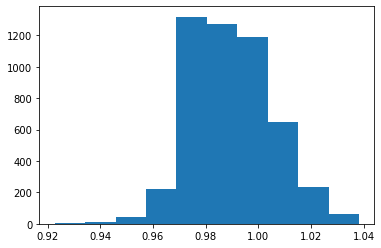

Not positive definite
1.2029908005428362
0.00914056455038863
[ 1.92140056e-02 -5.99685546e-01  2.82103517e+00  1.87658324e-01
 -3.06217771e-02  3.50897717e+00 -2.24331459e-02  3.96262011e+00
  5.76413580e-02  3.23344715e+00  1.13273417e-02  3.75708444e+00
  4.42396571e+00  4.41909643e+00  4.37420005e+00  4.68096676e+00
  6.72566524e-05 -3.26637084e-03  1.36300006e-02  1.02763086e-03
  7.20155210e-03  1.36644565e-02 -4.33684418e-04]


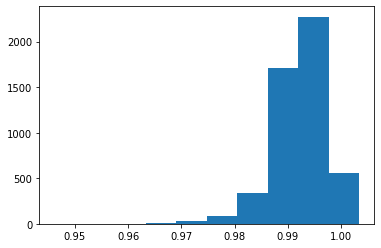

Not positive definite
1.2039095860336524
0.011147020912919497
[ 1.14780145e-02 -7.03095719e-01  2.96140767e+00  2.10529011e-01
  5.64934812e-02  3.40405187e+00 -2.10374612e-02  3.93720252e+00
  2.05059412e-02  3.14093071e+00  2.60322365e-02  3.73591622e+00
  4.43766369e+00  4.49875561e+00  4.32985458e+00  4.69400501e+00
 -2.05947508e-05 -1.27996180e-02  1.73399595e-02 -4.90440586e-04
  9.45193074e-03  2.80165373e-02 -1.48863298e-03]


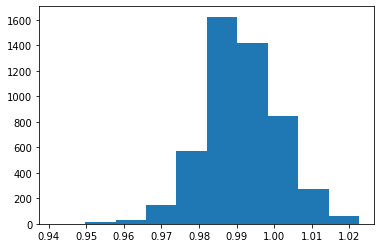

Not positive definite
1.2030037196494434
0.00913286767176401
[ 1.88692848e-02 -6.04293570e-01  2.82729026e+00  1.88677456e-01
 -2.67398649e-02  3.50430163e+00 -2.23709533e-02  3.96148749e+00
  5.59865799e-02  3.22932456e+00  1.19826013e-02  3.75614117e+00
  4.42457610e+00  4.42264610e+00  4.37222399e+00  4.68154776e+00
  6.33419372e-05 -3.69117850e-03  1.37953188e-02  9.59984615e-04
  7.30183043e-03  1.43039945e-02 -4.80693607e-04]


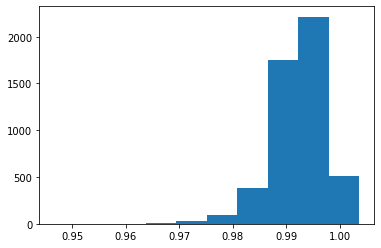

Not positive definite
1.203332175515024
0.009374665743485973
[ 1.50714709e-02 -6.48942173e-01  2.88684983e+00  1.99885042e-01
  1.21926293e-02  3.45877824e+00 -1.65061978e-02  3.95022738e+00
  3.70747331e-02  3.19083365e+00  1.94368254e-02  3.74785262e+00
  4.43322100e+00  4.45506229e+00  4.34929359e+00  4.68939344e+00
  1.55915392e-05 -7.96719619e-03  1.47205377e-02  2.53389794e-04
  8.09020305e-03  2.05122783e-02 -9.90887540e-04]


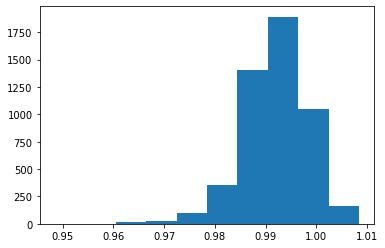

Not positive definite
1.2030410635025528
0.009123743392352668
[ 1.82609162e-02 -6.11445793e-01  2.83683106e+00  1.90472790e-01
 -2.05033008e-02  3.49700928e+00 -2.14314830e-02  3.95968374e+00
  5.29571068e-02  3.22315873e+00  1.31766873e-02  3.75481343e+00
  4.42596092e+00  4.42783882e+00  4.36855079e+00  4.68280455e+00
  5.56928404e-05 -4.37615023e-03  1.39435288e-02  8.46795775e-04
  7.42811918e-03  1.52984943e-02 -5.62421151e-04]


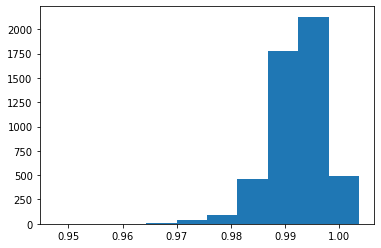

Not positive definite
1.2032088643370968
0.009112259483029565
[ 1.66974110e-02 -6.21854742e-01  2.84932707e+00  1.95103262e-01
 -9.86552404e-03  3.48579144e+00 -1.31067383e-02  3.95760838e+00
  4.16842195e-02  3.21587114e+00  1.62891254e-02  3.75404359e+00
  4.43221637e+00  4.43237204e+00  4.35756505e+00  4.68760505e+00
  2.59259572e-05 -5.89972699e-03  1.29623659e-02  5.50224957e-04
  7.29838588e-03  1.68541470e-02 -7.61379234e-04]


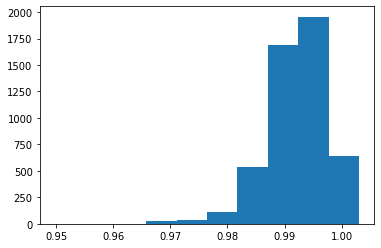

Not positive definite
1.2031142203414573
0.009095676867929671
[ 1.59410310e-02 -6.20196882e-01  2.84452424e+00  1.97002591e-01
 -8.54395499e-03  3.48652239e+00 -4.13302587e-03  3.95683288e+00
  3.59613713e-02  3.21958063e+00  1.80335477e-02  3.75535252e+00
  4.43800015e+00  4.42763912e+00  4.35234644e+00  4.69221367e+00
  7.67450603e-06 -6.27930379e-03  1.16096628e-02  4.29708386e-04
  6.87728983e-03  1.68357849e-02 -8.58977621e-04]


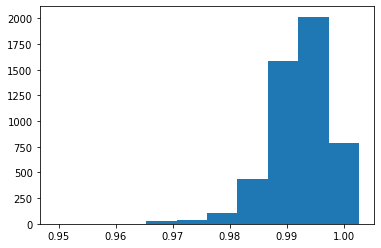

Not positive definite
1.2029616303195307
0.009079780313818687
[ 1.39075957e-02 -6.25656122e-01  2.84594753e+00  1.99774228e-01
  2.64606338e-03  3.47887576e+00  9.41184050e-03  3.95049411e+00
  2.67828626e-02  3.21953690e+00  2.20612804e-02  3.75640981e+00
  4.44899001e+00  4.42572469e+00  4.33505650e+00  4.70960434e+00
 -2.37586676e-05 -7.68498913e-03  1.00299091e-02  1.18274444e-04
  6.50647359e-03  1.80944041e-02 -1.15434166e-03]


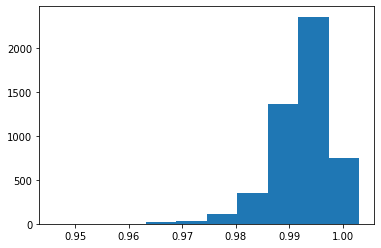

Not positive definite
1.2026007933255614
0.009067782769103031
[ 1.26839053e-02 -6.28922690e-01  2.84515112e+00  1.99529913e-01
  1.11358357e-02  3.47304270e+00  1.45554259e-02  3.94413081e+00
  2.29016303e-02  3.21974619e+00  2.42619639e-02  3.75739281e+00
  4.45638393e+00  4.42488313e+00  4.32272047e+00  4.72573106e+00
 -3.64165143e-05 -8.37795127e-03  9.48636900e-03 -4.74081003e-05
  6.43212789e-03  1.89934046e-02 -1.37496483e-03]


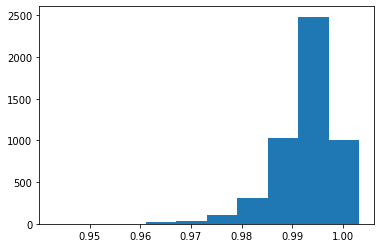

Not positive definite
1.2018421169053164
0.009050605920372254
[ 1.00865179e-02 -6.38692558e-01  2.84677819e+00  1.97348340e-01
  3.22907177e-02  3.45851613e+00  2.07497184e-02  3.92769154e+00
  1.64544057e-02  3.21829341e+00  2.86089496e-02  3.75909225e+00
  4.47071472e+00  4.42598710e+00  4.29340240e+00  4.76442570e+00
 -5.58600241e-05 -9.89737411e-03  9.00991141e-03 -3.89070809e-04
  6.57117530e-03  2.12697318e-02 -1.88197198e-03]


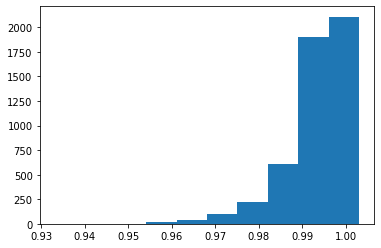

Not positive definite
1.2022173126977531
0.009051239777011888
[ 1.13351310e-02 -6.33995998e-01  2.84599603e+00  1.98397063e-01
  2.21211665e-02  3.46549933e+00  1.77720050e-02  3.93559421e+00
  1.95537083e-02  3.21899179e+00  2.65192715e-02  3.75827530e+00
  4.46382564e+00  4.42545640e+00  4.30749615e+00  4.74582446e+00
 -4.65131618e-05 -9.16695887e-03  9.23895357e-03 -2.24827094e-04
  6.50433259e-03  2.01754583e-02 -1.63824407e-03]


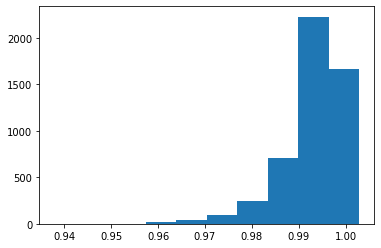

Not positive definite
1.2009273863638135
0.009417796577521512
[ 7.80784243e-03 -6.49930378e-01  2.84912101e+00  1.90947836e-01
  5.62874969e-02  3.44290373e+00  1.75297528e-02  3.90667865e+00
  1.55789782e-02  3.21617188e+00  3.17869725e-02  3.76087886e+00
  4.48239291e+00  4.42984853e+00  4.26071085e+00  4.81124834e+00
 -5.65579715e-05 -1.10178802e-02  9.82425217e-03 -6.52301583e-04
  7.19848383e-03  2.37933427e-02 -2.43364386e-03]


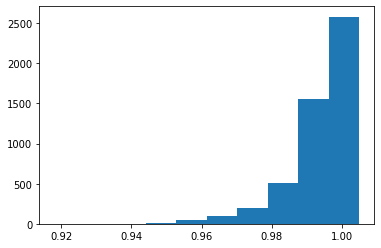

Not positive definite
1.202014157310313
0.009040771728701663
[ 1.07370908e-02 -6.36697620e-01  2.84652586e+00  1.97134071e-01
  2.79139563e-02  3.46166832e+00  1.77309320e-02  3.93069167e+00
  1.88798058e-02  3.21851368e+00  2.74123930e-02  3.75871673e+00
  4.46697366e+00  4.42620107e+00  4.29956386e+00  4.75691686e+00
 -4.82162265e-05 -9.48077653e-03  9.33818903e-03 -2.97303998e-04
  6.62202366e-03  2.07888588e-02 -1.77310151e-03]


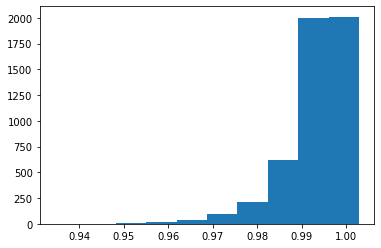

Not positive definite
1.2015520555362829
0.009112744222877951
[ 9.77764374e-03 -6.35284159e-01  2.83464144e+00  1.91895212e-01
  3.77825328e-02  3.46154073e+00  1.64266121e-02  3.91884686e+00
  1.37313139e-02  3.22729701e+00  3.06879411e-02  3.76413002e+00
  4.47579879e+00  4.42007672e+00  4.27791854e+00  4.78579477e+00
 -5.35166039e-05 -9.06486196e-03  8.93397515e-03 -5.02554482e-04
  6.54875086e-03  2.15182201e-02 -2.15846584e-03]


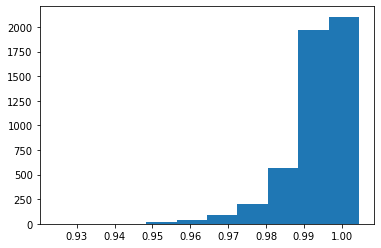

Not positive definite
1.2018893350321571
0.009030804094737652
[ 1.04698144e-02 -6.36303867e-01  2.84321518e+00  1.95674665e-01
  3.06630787e-02  3.46163278e+00  1.73675832e-02  3.92739202e+00
  1.74455731e-02  3.22096048e+00  2.83248734e-02  3.76022472e+00
  4.46943210e+00  4.42449499e+00  4.29353405e+00  4.76496148e+00
 -4.96927704e-05 -9.36491382e-03  9.22558582e-03 -3.54481314e-04
  6.60161181e-03  2.09920394e-02 -1.88045374e-03]


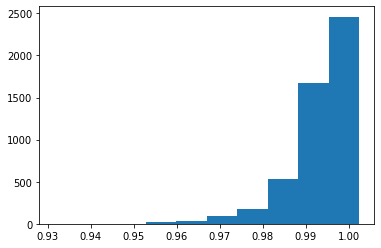

Not positive definite
1.2018957576363667
0.009021432614510608
[ 1.06378014e-02 -6.40253009e-01  2.84768426e+00  1.93127641e-01
  3.51270409e-02  3.45879337e+00  1.02233121e-02  3.92299287e+00
  2.24937436e-02  3.21828073e+00  2.82595102e-02  3.75966734e+00
  4.46744559e+00  4.42878706e+00  4.29086882e+00  4.76968350e+00
 -3.74798344e-05 -9.01933528e-03  1.02448049e-02 -3.41317731e-04
  7.02532923e-03  2.15698765e-02 -1.97311469e-03]


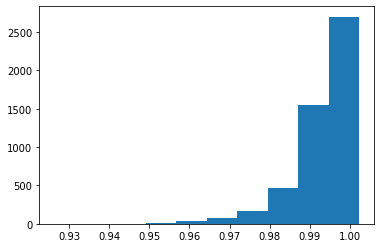

Not positive definite
1.201806860026826
0.009020754419657129
[ 1.03423980e-02 -6.42020337e-01  2.84895427e+00  1.93185545e-01
  3.78699549e-02  3.45654209e+00  1.08361035e-02  3.92125814e+00
  2.14022501e-02  3.21737697e+00  2.88161014e-02  3.75971896e+00
  4.46903629e+00  4.42955616e+00  4.28795366e+00  4.77306410e+00
 -4.04022605e-05 -9.20601363e-03  1.01930055e-02 -3.87792587e-04
  7.05543369e-03  2.18919781e-02 -2.03650906e-03]


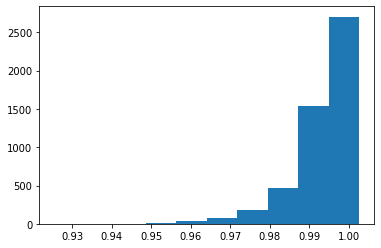

Not positive definite


In [9]:
#res = minimize(integration, g0, method='L-BFGS-B', options={'iprint':1, 'ftol': 1e-04, 'eps': 1e-02, 'maxiter':20})
res = minimize(integration, g0, method='L-BFGS-B', options={'ftol': 1e-06, 'maxiter':200})

In [ ]:
print(res.x)

In [ ]:
h_minimal = param_to_matrix(res.x, h_sym)

In [ ]:
sigma = HS.integrate(lambda patch: tf.abs(patch.num_eta_tf(h_minimal)/factor - 1), tensor=True)
delta_sigma = math.sqrt(HS.integrate(lambda patch: (tf.abs(patch.num_eta_tf(h_minimal)/factor - 1) - sigma)**2, 
                                     tensor=True) / HS.n_points)

In [ ]:
print(sigma)
print(delta_sigma)

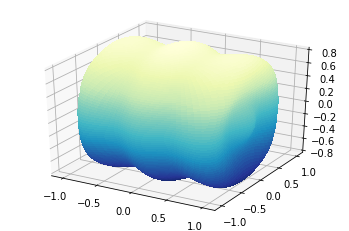

In [18]:
#param = [0.8, 0.8]
param = [-0.13814375, -0.16041894 ,-0.90220166 , 0.3039817 ,  0.08749082 , 0.11340696]
h_minimal = param_to_matrix(param)
#h_minimal = 'identity'
patch = HS.patches[0].patches[0]
theta, phi = np.linspace(0.001,np.pi+0.001, 100), np.linspace(0.001, 2*np.pi+0.001, 100)
R = []
for j in phi:
    theta_list = []
    for i in theta:
        t = complex(math.sin(i)*math.sin(j), math.cos(i))/(sin(i)*cos(j)) 
        if np.absolute(t) <= 1:
            eta = patch.num_eta(h_minimal, [1, -1, complex(t), 0, -complex(t)])/factor 
            #print('test',np.absolute(t**4))
            #print(patch.restriction([1, -1, complex(t), 0, -complex(t)]))
            #print("t<=1", t)
        else:
            #eta = 0
            eta = patch.num_eta(h_minimal, [1, -1, complex(1/t), 0, -complex(1/t)])/factor
  
            #print('test',np.absolute(t**4), 1/t**4)
        theta_list.append(float(eta))
    R.append(theta_list)
R = np.asarray(R)
THETA, PHI = np.meshgrid(theta, phi)
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
ZZ = R * np.cos(THETA)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.set_zlim3d(-0.8, 0.8)
plot = ax.plot_surface(
    X, Y, ZZ, rstride=1, cstride=1, cmap=plt.cm.YlGnBu_r,
    linewidth=0, antialiased=False)


Standard deviation of eta:

In [19]:
sum_eta_sq = 0
mean_abs_eta = 0
for patch in HS.patches:
    for subpatch in patch.patches:
        for point in subpatch.points:
            #print(subpatch.num_eta(h_minimal, point)*factor - 1)
            eta = sum_eta = 0
mean_abs_eta = 0
for patch in HS.patches:
    for subpatch in patch.patches:
        for point in subpatch.points:
            #print(subpatch.num_eta(h_minimal, point)*factor - 1)
            eta = subpatch.num_eta(h_minimal, point)
            sum_eta_sq += (eta/factor - 1)**2
            mean_abs_eta += abs(eta/factor - 1)
print(math.sqrt((sum_eta_sq-mean_abs_eta**2/HS.n_points)/(HS.n_points - 1)))

0.21875651133455828


In [ ]:
# k = 6, 20k points
g0 = [ 1.34324125e-03, -3.96012401e-01 , 2.45408482e+00 , 4.22872089e-02,
 -1.14449106e-01 , 3.57388925e+00,  3.41178473e-02 , 4.00246942e+00,
  4.45253468e-02 , 3.45675943e+00, -1.30400261e-03 , 3.94223532e+00,
  4.39484235e+00 , 4.17491341e+00 , 3.86355451e+00 , 5.39889715e+00,
 -1.53971471e-06, -1.08164686e-04,  1.64251667e-04 ,3.76561480e-05,
  2.47039528e-04,  9.06781544e-04 , 4.10003787e-06]